In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Carga el conjunto de datos
malware = pd.read_csv("uci_malware_detection.csv")

In [3]:
malware.isnull()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
malware.head()

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
(malware['Label'] == 'non-malicious').sum()

72

In [6]:
(malware['Label'] == 'malicious').sum()

301

In [7]:
#Características (X) y etiquetas (y)
X = malware.drop(columns=['Label'])  # Excluir la columna de etiqueta
y = malware['Label']

# Verificar las primeras filas de X y y 
print("Características (X):")
print(X.head())
print("\nEtiquetas (y):")
print(y.head())

Características (X):
   F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  F_10  ...  F_522  F_523  \
0    1    0    1    0    1    0    1    0    1     0  ...      0      0   
1    1    0    1    0    1    0    1    0    1     0  ...      0      0   
2    1    0    1    0    1    0    1    0    1     0  ...      0      0   
3    1    0    1    0    1    0    1    0    1     0  ...      0      0   
4    1    0    1    0    1    0    1    0    1     0  ...      0      0   

   F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 531 columns]

Etiquetas (y):
0    non-malicious
1    non-malicious
2    non-malicious
3    non-malicious
4    non-malicious
Name: Label, dtype: object


In [8]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
import numpy as np

# Contar las clases en y
clases, conteo = np.unique(y_resampled, return_counts=True)
print("Clases después de oversampling:", dict(zip(clases, conteo)))

Clases después de oversampling: {'malicious': 301, 'non-malicious': 301}


In [9]:
#Paso 1: Separa el dataset en conjuntos de entrenamiento, validación y prueba.
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 481
Tamaño del conjunto de prueba: 121


In [10]:
# Paso 2:
"""Este tipo de aprendizaje automático es supervisado para clasificación de malware 
porque utiliza un clasificador de bosque aleatorio (RandomForestClassifier). 
Este clasificador es una técnica de aprendizaje automático que se basa en el ensamblaje 
de múltiples árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos ya que se entrenó 
un modelo utilizando un conjunto de datos etiquetado con ejemplos de malware y software benigno. 
El modelo luego utiliza esta información etiquetada para hacer predicciones sobre nuevos archivos 
ejecutables y clasificarlos como maliciosos o benignos."""

'Este tipo de aprendizaje automático es supervisado para clasificación de malware \nporque utiliza un clasificador de bosque aleatorio (RandomForestClassifier). \nEste clasificador es una técnica de aprendizaje automático que se basa en el ensamblaje \nde múltiples árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos ya que se entrenó \nun modelo utilizando un conjunto de datos etiquetado con ejemplos de malware y software benigno. \nEl modelo luego utiliza esta información etiquetada para hacer predicciones sobre nuevos archivos \nejecutables y clasificarlos como maliciosos o benignos.'

In [11]:
# Paso 3
# Se inicializa y entrena un modelo de clasificación de bosque aleatorio utilizando RandomForestClassifier de scikit-learn.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

In [12]:
#Paso 4

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener TN, FP, FN, TP de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()

print("Matriz de confusión:")
print(conf_matrix)

Exactitud del modelo: 0.9917355371900827
Reporte de clasificación:
               precision    recall  f1-score   support

    malicious       1.00      0.98      0.99        66
non-malicious       0.98      1.00      0.99        55

     accuracy                           0.99       121
    macro avg       0.99      0.99      0.99       121
 weighted avg       0.99      0.99      0.99       121

Matriz de confusión:
[[65  1]
 [ 0 55]]


In [13]:
# Precisión: La clasificación para la clase maliciosa fue del 100% después de utilizar el oversampling y solo el 98% no maliciosa.
# Exhaustividad (recall): Para ambas clases, la exhaustividad es del 98% o superior, lo que indica que el modelo identificó correctamente la gran mayoría de las muestras positivas.
# f1-score: Adecuada proporcionalidad entre la precisión y la Exhaustividad (recall)
# El soporte indica el número de muestras de cada clase en el conjunto de prueba. Hay 66 muestras de la clase maliciosa y 55 muestras de la clase no maliciosa.
# Como resultado una exactitud del modelo del 99%

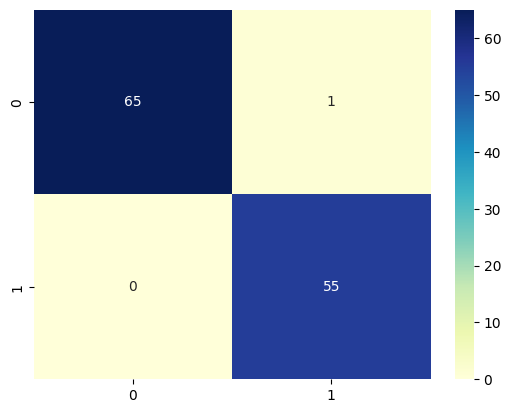

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Graficar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

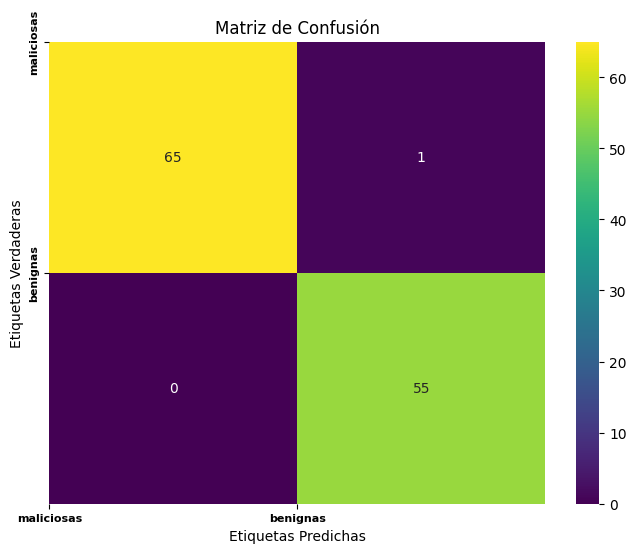

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
labels = ['maliciosas','benignas']
plt.xticks(np.arange(0, 2), labels, fontsize=8, fontweight='bold')
plt.yticks(np.arange(0, 2), labels, fontsize=8, fontweight='bold')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

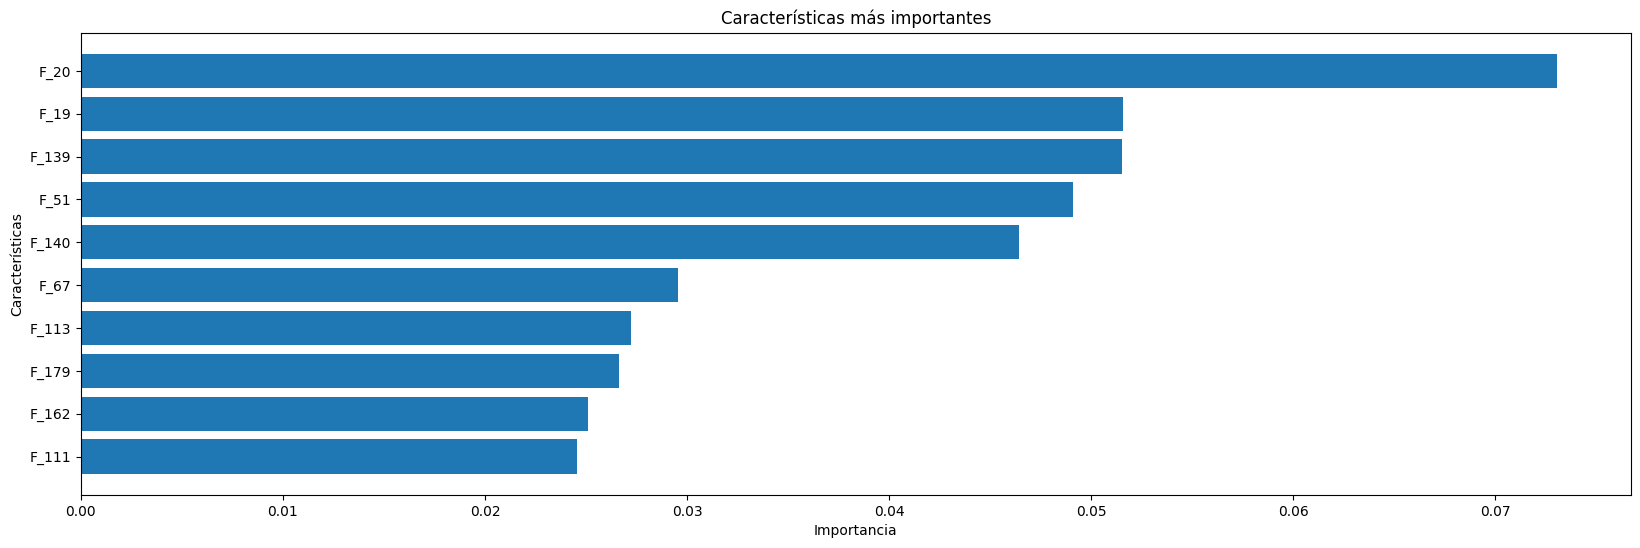

Características más importantes:
     Feature  Importance
19     F_20    0.073065
18     F_19    0.051568
138   F_139    0.051530
50     F_51    0.049094
139   F_140    0.046433
66     F_67    0.029551
112   F_113    0.027236
178   F_179    0.026635
161   F_162    0.025111
110   F_111    0.024567


In [17]:
#Paso 5
import matplotlib.pyplot as plt

# Obtener la importancia de las características del modelo
importances = model.feature_importances_

# Obtener el nombre de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar las características y sus importancias
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Graficar las características más importantes
plt.figure(figsize=(20, 6))
plt.barh(feature_importances_df['Feature'][:10], feature_importances_df['Importance'][:10])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Características más importantes')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

# Mostrar las características más importantes
top_features = feature_importances_df.head(10)
print("Características más importantes:\n", top_features)

In [18]:
# Las características más importantes en un modelo de Bosque Aleatorio se determinan según su contribución 
# a la reducción de la impureza en los nodos del árbol de decisión durante el proceso de entrenamiento. 
# Ayudan al modelo a hacer predicciones precisas se consideran las más importantes.

In [19]:
#Metodo regresion logistica.

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [21]:
df = pd.read_csv("uci_malware_detection.csv")

In [22]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [23]:
df

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [24]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_res, y_res = oversampler.fit_resample(X, y)
import numpy as np

# Contar las clases en y
clases, conteo = np.unique(y_res, return_counts=True)
print("Clases después de oversampling:", dict(zip(clases, conteo)))

Clases después de oversampling: {'malicious': 301, 'non-malicious': 301}


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

# Imprimir los tamaños de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 481
Tamaño del conjunto de prueba: 121


In [26]:
# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = modelo.predict(X_test)

In [28]:
# Evaluar el modelo
score = modelo.score(X_test, y_test)
print("Precisión:", score)

Precisión: 1.0


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener TN, FP, FN, TP de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()

print("Matriz de confusión:")
print(conf_matrix)

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

    malicious       1.00      1.00      1.00        60
non-malicious       1.00      1.00      1.00        61

     accuracy                           1.00       121
    macro avg       1.00      1.00      1.00       121
 weighted avg       1.00      1.00      1.00       121

Matriz de confusión:
[[60  0]
 [ 0 61]]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

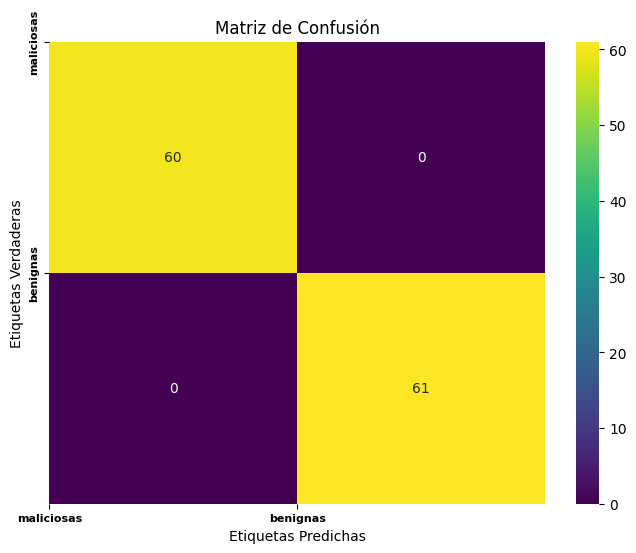

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
labels = ['maliciosas','benignas']
plt.xticks(np.arange(0, 2), labels, fontsize=8, fontweight='bold')
plt.yticks(np.arange(0, 2), labels, fontsize=8, fontweight='bold')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [32]:
#Usando el metodo RandomForestClassifier, nos dio un resultado una evalucion del 99%.
#usando el metodo LogisticRegression, Nos dio un resultado de evalucion del 100%.
#Por lo cual para el ejercicio propuesto, el numero de caracteristicas se puede observar que el mejor metodo es el LogisticRegression, este resultado se puede dar porque la matriz es muy pequeña. Por lo cual para probar los dos metodos seria de tener una matriz con los datos no menos desbalanciados y volver a evaluar los metodos.
#En resumen, la regresión logística es una elección popular para problemas de clasificación binaria debido a su facilidad de interpretación, robustez y escalabilidad, entre otras ventajas. Sin embargo, es importante tener en cuenta que su rendimiento puede verse afectado si la relación entre las características y la variable de respuesta es altamente no lineal. En tales casos, modelos más complejos como los árboles de decisión o las máquinas de vectores de soporte pueden ser más apropiados.